# **Лабораторная работа 8. Регрессионный анализ. Модели и методы.**  

> Авторы: Балаев Жамал, Васильева Марина, Иванов Никита, Максим Шардт

### **Формулировка задания лабораторной работы**

**Задание 1**  
Изучить теоретический материал  

**Задание 2**  
Построить уравнение регрессии оценить его качество.  

**Задание 2.1**  
Построить график зависимости между переменными, по которому необходимо подобрать модель регрессии.  

**Задание 2.2**  
Рассчитать параметры уравнения регрессии методом наименьших квадратов.  

**Задание 2.3**  
Оценить качество уравнения с помощью средней ошибки аппроксимации.  

**Задание 2.4**  
Найти коэффициент эластичности.  

**Задание 2.5**  
Оценить тесноту связи между переменными с помощью показателей корреляции и детерминации.  

**Задание 2.6**  
Оценить значимость коэффициентов корреляции и регрессии о критерию t-Стьюдента при уровне значимости   α = 0.05.  

**Задание 2.7**  
Охарактеризовать статистическую надежность результатов регрессионного анализа с использованием критерия F-Фишера при уровне значимости   α = 0.05.  

**Задание 2.8**  
Определить прогнозное значение результативного признака, если возможное значение факторного признака составит 1.2 от его среднего уровня по совокупности.  

**Задание 3.**  
Результаты выполненной работы разместить в Moodle.  

## **Решение**

Импортируются необходимые модули и библиотеки

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

sns.set(style="darkgrid")

Проходит считыввание значений y и x 

In [125]:
with open('data.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    y, x = reader
    x = np.array(x[1:], int)
    y = np.array(y[1:], float)

На график наносятся точки, значения которых соответсвует x и y. Храрактер расположени точек на графике показывает, что связь между переменными может выражаться линейным уравнением регрессии.

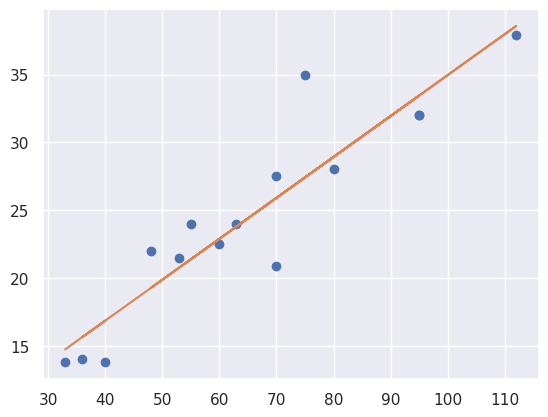

In [126]:
plt.figure()
plt.plot(x, y, 'o', label='visualization of dependency')
z = np.polyfit (x, y, 1 )
p = np.poly1d(z)
plt.plot (x, p(x)) 

Для проведения всех расчетов строится вспомогательная таблица. Все средние находятся по формуле средней арифметической простой, также производится суммирование элементов таблицы:  

In [128]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.1f}'.format)
n = len(x)
df = pd.DataFrame({
    'x': x,
    'y': y
}, index=(range(1, n + 1)))

df.index.name = '№'

df['x^2'] = df['x'] ** 2
df['y^2'] = df['y'] ** 2
df['xy'] = df['x'] * df['y']
df.loc['total'] = df.sum()
df.loc['average'] = df[:15].sum() / n

print(df)

            x     y     x^2    y^2      xy
№                                         
1        33.0  13.8  1089.0  190.4   455.4
2        40.0  13.8  1600.0  190.4   552.0
3        36.0  14.0  1296.0  196.0   504.0
4        60.0  22.5  3600.0  506.2  1350.0
5        55.0  24.0  3025.0  576.0  1320.0
6        80.0  28.0  6400.0  784.0  2240.0
7        95.0  32.0  9025.0 1024.0  3040.0
8        70.0  20.9  4900.0  436.8  1463.0
9        48.0  22.0  2304.0  484.0  1056.0
10       53.0  21.5  2809.0  462.2  1139.5
11       95.0  32.0  9025.0 1024.0  3040.0
12       75.0  35.0  5625.0 1225.0  2625.0
13       63.0  24.0  3969.0  576.0  1512.0
14      112.0  37.9 12544.0 1436.4  4244.8
15       70.0  27.5  4900.0  756.2  1925.0
total   985.0 368.9 72111.0 9867.9 26466.7
average  65.7  24.6  4807.4  657.9  1764.4


Затем производится подтсановка полученных сумм в систему уравнений:  

In [129]:
b1 = float((((df.loc[['average'], 'xy'] - df.loc[['average'], 'x'] * df.loc[['average'], 'y']))
           / (df.loc[['average'], 'x^2'] - df.loc[['average'], 'x'] ** 2)).iloc[0])

b0 = float((df.loc[['average'], 'y'] - b1 * df.loc[['average'], 'x']).iloc[0])
print(f'b0 = {b0:0.4f}', f'b1 = {b1:0.4f}', sep='\n')

b0 = 4.7743
b1 = 0.3018


Таким образом уравнение имеет вид:  
$$y' = 4,7743 + 0,3018x$$  

Коэффицент регрессии показывает, что при увелиении общей площади квартиры на 1 квадратный метр стоимость квартиры в среднем увеличвается на 0.3018 тыс. у.е.

Для проведения всех расчетов строится вспомогательная таблица. Все средние находятся по формуле средней арифметической простой, также производится суммирование элементов таблицы:  

In [130]:
df = df[:15]

df["y'"] = b0 + b1 * x
df["y-y'"] = y - y_
df["(y-y')^2"] = (y - y_) ** 2
df["A"] = abs((y - y_) / y)

df.loc['total'] = df.sum()
df.loc['average'] = df[:15].sum() / n
print(df)

            x     y     x^2    y^2      xy    y'  y-y'  (y-y')^2   A
№                                                                   
1        33.0  13.8  1089.0  190.4   455.4  14.7  -0.9       0.9 0.1
2        40.0  13.8  1600.0  190.4   552.0  16.8  -3.0       9.3 0.2
3        36.0  14.0  1296.0  196.0   504.0  15.6  -1.6       2.7 0.1
4        60.0  22.5  3600.0  506.2  1350.0  22.9  -0.4       0.1 0.0
5        55.0  24.0  3025.0  576.0  1320.0  21.4   2.6       6.9 0.1
6        80.0  28.0  6400.0  784.0  2240.0  28.9  -0.9       0.8 0.0
7        95.0  32.0  9025.0 1024.0  3040.0  33.4  -1.4       2.1 0.0
8        70.0  20.9  4900.0  436.8  1463.0  25.9  -5.0      25.0 0.2
9        48.0  22.0  2304.0  484.0  1056.0  19.3   2.7       7.5 0.1
10       53.0  21.5  2809.0  462.2  1139.5  20.8   0.7       0.5 0.0
11       95.0  32.0  9025.0 1024.0  3040.0  33.4  -1.4       2.1 0.0
12       75.0  35.0  5625.0 1225.0  2625.0  27.4   7.6      57.6 0.2
13       63.0  24.0  3969.0  576.0

С помощью формулы срденей ошибки аппроксимации оценивается качество уравнения:

In [131]:
a = float((df.loc[['total'], 'A'] / n * 100).iloc[0])
print(f'A = {a:.3f} %')

A = 9.031 %


 Находится коэффициент эластичности при линейной форме:

In [132]:
e = b1 * float((df.loc[['average'], 'x'] / df.loc[['average'], 'y']).iloc[0])
print(f'Э = {e:.3f}%')

Э = 0.806%


Коэффициент эластичности показывает насколько увеличивается цена квартиры при изменении площади на 1%  
  
Затем с помощью коэффициента корелляции определяется тесность связи между переменными X и Y:

In [133]:
xsigma = float((np.sqrt((df.loc[['average'], 'x^2'])
                        - (df.loc[['average'], 'x']) ** 2)).iloc[0])
ysigma = float((np.sqrt((df.loc[['average'], 'y^2'])
                        - (df.loc[['average'], 'y']) ** 2)).iloc[0])

r = float(((df.loc[['average'], 'xy'] - df.loc[['average'], 'x'] * df.loc[['average'], 'y'])
           / (xsigma * ysigma)).iloc[0])
r2 = r ** 2 * 100
print(f'r = {r:0.2f}', f'r2 = {r2:0.2f}%', sep='\n')

r = 0.92
r2 = 85.09%


Значение кореляции близкое к единице говороит о том, что зависимость между переменными X и Y очень сильная, близкая к функциональной.  
Коэффициент детерминации показывает, что на 85% различие стоимостей квартир определеяет их площадь, а оставшиеся 15% неуказанные факторы.

Учитывая что данные являются выборочными необходимо оценить существенность или значимость величины корлляции, для этого выдвигается гипотеза: коэффициент кореляции в генеральной совокупности равен нулю и изучаемые признак не оказывает ощутимого влияния на результат.
$$Н_0:r_s = 0, при H_1: r_s \neq 0$$  

Проверка гипотеза будет осуществляется с помощью t-критерия Стьюдента :

In [134]:
t_calc1 = abs(r) / np.sqrt((1 - r**2) / (n - 2))
k = n - 2

mb1 = float((np.sqrt(df.loc[['total'], "(y-y')^2"] \
            / ((n-2) * xsigma ** 2 * n))).iloc[0])
t_calc2 = b1 / mb1


print(f'tрасч = {t_calc1:.2}', f'tрасч = {t_calc1:.2}', sep='\n')

tрасч = 8.6
tрасч = 8.6


По таблице находится значение при уровне значимости a = 0.05 и числе степеней свободы k = n - 2 = 13  
Критерий таблицы Стьюдента tкр = 2.16  

Сравнив значение tрасч и tкр получим, что tрасч, при вычислении обоими методами, значительно больше, чем tкр, а значит нулевая гипотез отвергается, следовательно площадь квартир оказывает существенное влияние на стоимость.  
  
  

С помощью критерия F-Фишера проверяется надежность уравнения:

In [135]:
f_calc = r ** 2 / (1 - r ** 2) * (n - 2)
k1 = k = 1
k2 = n - k - 1
print(f'Fрасч = {f_calc:.2f}')

Fрасч = 74.16


Используя данные таблицы было найдено значение F-критерия Фишера при уровне значимости a = 0.05 и числе стпеней свободы k1 = k = 1, k2 = n - k - 1 = 13  
$$F_{кр} = F_{0.05;1;13} = 4.67$$  
Так как значение Fрасч > Fкр, то уравнение статистически значимое или надежное  

Подставив значение прогнозного или возможного значения факторного признака x = 65.67, определяется прогнозное значение рузультативного признака:  


In [136]:
xp = float((df.loc[['average'], 'x'] * 1.2).iloc[0])
yp = b0 + b1 * xp
print(f"y'p = {yp:.2f}")

y'p = 28.56


Полученное значение означает, что при x = 65.67 возможное значение стоимости квартиры составит 28.56 тыс. у.е.
